In [27]:
import os
import logging
import logging.handlers
import random

import numpy as np
import skvideo.io
import cv2
import matplotlib.pyplot as plt

import utils

import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
cv2.ocl.setUseOpenCL(False)
random.seed(123)

In [29]:
IMAGE_DIR = "./out"
VIDEO_SOURCE = "input.mp4"
SHAPE = (720, 1280)  # HxW
EXIT_PTS = np.array([[[732, 720], [732, 590], [1280, 500], [1280, 720]], [[0, 400], [645, 400], [645, 0], [0, 0]]])

In [30]:
if not os.path.exists(IMAGE_DIR):
    print("Creating image directory", IMAGE_DIR)
    os.makedirs(IMAGE_DIR)

# creting MOG bg subtractor with 500 frames in cache
# and shadow detction
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, detectShadows=True)

# Set up image source
cap = cv2.VideoCapture('video/short.mp4')

# skipping 500 frames to train bg subtractor
#train_bg_subtractor(bg_subtractor, cap, num=500)

frame_number = -1
while(cap.isOpened()):
    ret, frame = cap.read()
    if not ret:
        break
    if not frame.any():
        log.error("Frame capture failed, stopping...")
        break

    frame_number += 1

    cv2.imwrite("./out/frame_%04d.png" % frame_number, frame)

    fg_mask = fgbg.apply(frame)
    closing = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, kernel)
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
    dilation = cv2.dilate(opening, kernel, iterations=2)
    ret,thresh = cv2.threshold(dilation,127,255,cv2.THRESH_TOZERO)
    
    cv2.imwrite("./out/fg_mask_%04d.png" % frame_number, thresh)


Creating image directory ./out


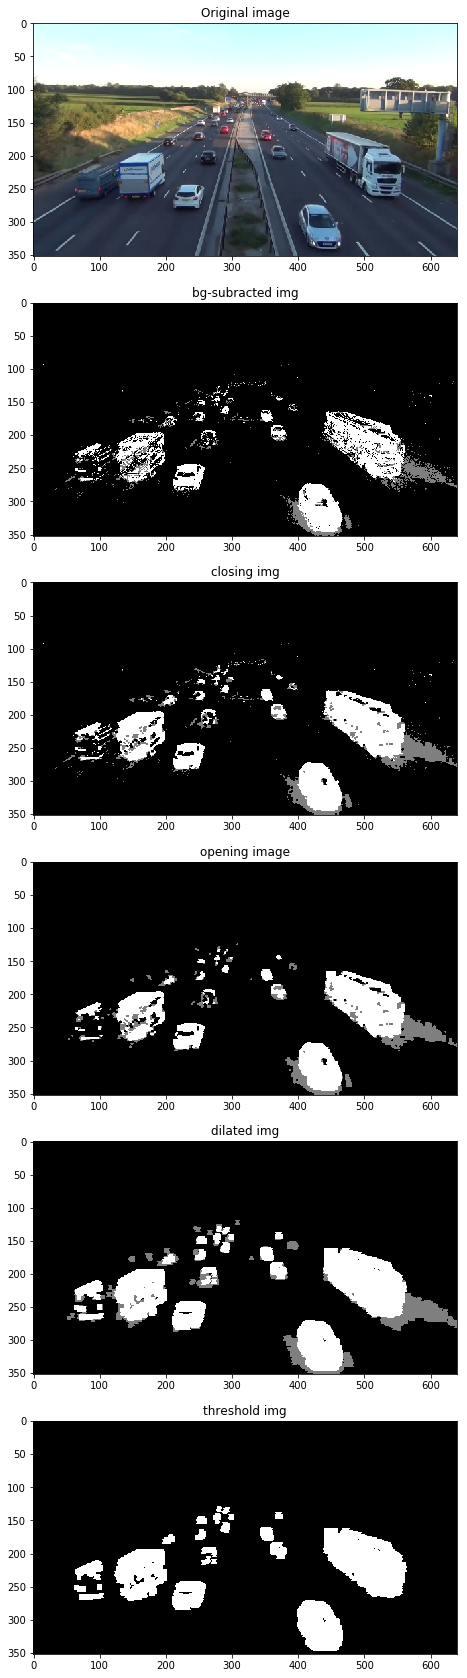

In [38]:
img = cv2.imread("examples/frame_0059.png")
fg_mask = fgbg.apply(img)
closing = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, kernel)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
dilation = cv2.dilate(opening, kernel, iterations=2)
ret,thresh = cv2.threshold(dilation,127,255,cv2.THRESH_TOZERO)


new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

f, axs = plt.subplots(6,figsize=(15,30))

axs[0].imshow(new_img)
axs[0].set_title('Original image')
axs[1].imshow(fg_mask,'gray')
axs[1].set_title('bg-subracted img')
axs[2].imshow(closing,'gray')
axs[2].set_title('closing img')
axs[3].imshow(opening,'gray')
axs[3].set_title('opening image')
axs[4].imshow(dilation,'gray')
axs[4].set_title('dilated img')
axs[5].imshow(thresh,'gray')
axs[5].set_title('threshold img')

plt.show()

In [34]:
#code for detection in live video
import numpy as np
import cv2

cap = cv2.VideoCapture('video/short.mp4')

fgbg = cv2.createBackgroundSubtractorMOG2()
#definig kernel for dilation, erosion, etc.
kernel = np.array([[1,1,1],
                   [0,1,0],
                   [1,1,1]],np.uint8)

while(1):
    ret, frame = cap.read()

    fg_mask = fgbg.apply(frame)
    closing = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, kernel)
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
    dilation = cv2.dilate(opening, kernel, iterations=2)
    ret,thresh = cv2.threshold(dilation,127,255,cv2.THRESH_TOZERO)

    cv2.imshow('frame1',frame)
    cv2.imshow('frame2',thresh)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()